In [1]:
# 导入所需的包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import itertools

In [2]:
# 使用 pandas 载入数据
df = pd.read_csv('creditcard.csv')

In [3]:
# 初见数据
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# 提取 x 和 y, 以及大致分析数据
y = df.pop('Class')
del df['Time']
X = df.values
y = np.array(y)
num_fraud = np.count_nonzero(y)
print("Amount of data that is not fraudulent: {}".format(len(y)-num_fraud))
print("Amount of data that is fraudulent: {}".format(num_fraud))
print("Percentage of non fraud: {0:.2f}".format(100*(1-num_fraud/len(y))))
print("Percentage of fraud: {0:.2f}".format(100*(num_fraud/len(y))))

Amount of data that is not fraudulent: 284315
Amount of data that is fraudulent: 492
Percentage of non fraud: 99.83
Percentage of fraud: 0.17


In [5]:
# 我们可以观测到数据是高度 skew 的, 所以如果我们把所有 instances 都预测成 not fradulent 那么我们也能有 99.83% 的准确率, 但这明显不是我们想要的.
# 因此我们需要在已有数据集的基础上进行加工做出一个新的数据集.
x_stand = []
y_stand = []
for i in range(len(y)):
    if y[i] == 1:
        x_stand.append(X[i])
        y_stand.append(1)

for r in range(500):
    i = randint(0,len(y)-1)
    if y[i] == 0:
        x_stand.append(X[i])
        y_stand.append(0)

x_stand = np.array(x_stand)
y_stand = np.array(y_stand)

num_fraud = np.count_nonzero(y_stand)
print("Amount of data that is not fraudulent: {}".format(len(y_stand)-num_fraud))
print("Amount of data that is fraudulent: {}".format(num_fraud))
print("Percentage of non fraud: {0:.2f}".format(100*(1-num_fraud/len(y_stand))))
print("Percentage of fraud: {0:.2f}".format(100*(num_fraud/len(y_stand))))

Amount of data that is not fraudulent: 500
Amount of data that is fraudulent: 492
Percentage of non fraud: 50.40
Percentage of fraud: 49.60


In [6]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x_stand,y_stand,test_size=0.3)

In [7]:
# 我们先使用默认参数训练 RF
rf0 = RandomForestClassifier(oob_score=True,random_state=666,max_features='log2')
rf0.fit(X_train,y_train)
print("Out of bac accuracy: {0:.4f}".format(rf0.oob_score_))
y_predprob = rf0.predict_proba(X_test)[:,1]
print("AUC Score: {}".format(roc_auc_score(y_test,y_predprob)))

Out of bac accuracy: 0.9424
AUC Score: 0.9617867461177321


In [8]:
# 我们知道一般 max_features = log_2 d, 我们现在来优化其他参数: n_estimators, max_depth, min_samples_leaf.
# 模型评估指标我们使用 AUC, 模型调优我们使用 Grid Seach, 通过构建参数候选集合, 然后网格搜索会穷举各种参数组合, 根据设定评定的评分机制找到最好的那一组设置.
param_test1 = {"n_estimators":range(10,301,10)}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(max_features='log2',random_state=666,oob_score=True),
                        param_grid=param_test1,
                        scoring='roc_auc',
                        cv=5)
gsearch1.fit(X_train,y_train)
print("CV results: {}".format(gsearch1.cv_results_))
print("Best params: {}".format(gsearch1.best_params_))
print("Best score: {}".format(gsearch1.best_score_))

CV results: {'mean_fit_time': array([0.0266614 , 0.04230857, 0.06347756, 0.08299189, 0.10017042,
       0.11995854, 0.13929329, 0.15966859, 0.17862434, 0.21123519,
       0.21999784, 0.2377634 , 0.25715842, 0.27890577, 0.297054  ,
       0.31697316, 0.3404994 , 0.38660841, 0.40125985, 0.39930234,
       0.41512728, 0.43850636, 0.45764666, 0.50368762, 0.49337687,
       0.517523  , 0.53279462, 0.55479312, 0.57403555, 0.59452829]), 'std_fit_time': array([0.00838231, 0.00159406, 0.0016496 , 0.00272715, 0.00094433,
       0.00143887, 0.00124856, 0.00171979, 0.00142246, 0.01901591,
       0.0019598 , 0.00186645, 0.00242393, 0.00457687, 0.00281668,
       0.00250688, 0.00401825, 0.04571692, 0.04925437, 0.00520684,
       0.00381274, 0.00500338, 0.00311831, 0.05375291, 0.00363183,
       0.00533108, 0.00385301, 0.00172137, 0.0067865 , 0.00774736]), 'mean_score_time': array([0.00274029, 0.00297065, 0.00379305, 0.00464129, 0.00540152,
       0.00620952, 0.00708413, 0.00763526, 0.00867944, 0.009

In [9]:
# 在优化 n_estimators 基础上, 我们继续优化 max_depth
param_test2 = {"max_depth":range(2,20,2)}
gsearch2 = GridSearchCV(estimator=RandomForestClassifier(max_features='log2',random_state=666,oob_score=True,n_estimators=60),
                        param_grid=param_test2,
                        scoring='roc_auc',
                        cv=5)
gsearch2.fit(X_train,y_train)
print("CV results: {}".format(gsearch2.cv_results_))
print("Best params: {}".format(gsearch2.best_params_))
print("Best score: {}".format(gsearch2.best_score_))

CV results: {'mean_fit_time': array([0.10870676, 0.10586309, 0.11316481, 0.11701398, 0.11914477,
       0.11988797, 0.12005277, 0.12203021, 0.12011948]), 'std_fit_time': array([0.01118633, 0.00065534, 0.00075227, 0.00066121, 0.00130705,
       0.00093627, 0.00226982, 0.00249951, 0.00153336]), 'mean_score_time': array([0.00643458, 0.00628052, 0.00616274, 0.00628357, 0.0061882 ,
       0.00630441, 0.00629807, 0.0062737 , 0.00628972]), 'std_score_time': array([0.00104454, 0.000274  , 0.00019868, 0.00017359, 0.00013207,
       0.00012073, 0.00023063, 0.0001507 , 0.00013065]), 'param_max_depth': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': 2}, {'max_depth': 4}, {'max_depth': 6}, {'max_depth': 8}, {'max_depth': 10}, {'max_depth': 12}, {'max_depth': 14}, {'max_depth': 16}, {'max_depth': 18}], 'split0_test_score'

In [13]:
# 在优化 max_depth 的基础上, 我们继续优化 min_samples_leaf
param_test3 = {"min_samples_leaf":range(2,30,2)}
gsearch3 = GridSearchCV(estimator=RandomForestClassifier(max_features='log2',random_state=666,oob_score=True,n_estimators=60,max_depth=14),
                        param_grid=param_test3,
                        scoring='roc_auc',
                        cv=5)
gsearch3.fit(X_train,y_train)
print("CV results: {}".format(gsearch3.cv_results_))
print("Best params: {}".format(gsearch3.best_params_))
print("Best score: {}".format(gsearch3.best_score_))

CV results: {'mean_fit_time': array([0.12327867, 0.11740952, 0.114674  , 0.11462612, 0.11097293,
       0.1097312 , 0.1085196 , 0.10730047, 0.10674148, 0.10556722,
       0.10658503, 0.10484653, 0.10561895, 0.10379281]), 'std_fit_time': array([0.00550119, 0.00086537, 0.001287  , 0.00275502, 0.00106211,
       0.00015934, 0.00028134, 0.00026736, 0.00108577, 0.00058727,
       0.00167209, 0.0004357 , 0.00160965, 0.00055939]), 'mean_score_time': array([0.00613256, 0.00631366, 0.00634294, 0.00624175, 0.00593443,
       0.00591736, 0.00624332, 0.0061275 , 0.0063858 , 0.00618358,
       0.0062542 , 0.00617733, 0.0061573 , 0.00617037]), 'std_score_time': array([1.55334152e-04, 2.91005033e-04, 2.63075274e-04, 2.77758173e-04,
       5.58594735e-05, 5.22454265e-05, 2.45761224e-04, 1.97520525e-04,
       5.04762865e-04, 7.49006908e-05, 1.14169494e-04, 1.99801518e-04,
       1.77899285e-04, 2.12936149e-04]), 'param_min_samples_leaf': masked_array(data=[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 2

In [14]:
# ok 根据我们现在的参数在重新构建一下 RF
rf1 = RandomForestClassifier(n_estimators=60,max_depth=14,random_state=666,max_features='log2',min_samples_leaf=8,oob_score=True)
rf1.fit(X_train,y_train)
print("Out of bac accuracy: {0:.4f}".format(rf1.oob_score_))
y_predprob = rf1.predict_proba(X_test)[:,1]
print("AUC Score: {}".format(roc_auc_score(y_test,y_predprob)))

Out of bac accuracy: 0.9452
AUC Score: 0.9625315998555434


Confusion Matrix without Normalization
[[278229   6086]
 [    47    445]]


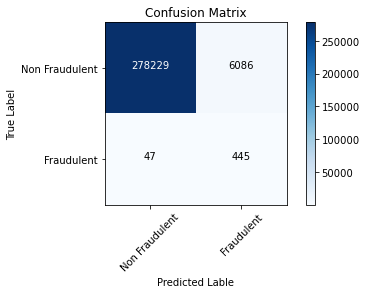

Confusion Matrix with Normalization
[[0.97859 0.02141]
 [0.09553 0.90447]]


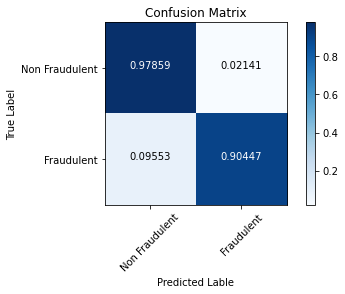

In [21]:
# 可以观测到, 我们模型的表现有了提升虽然不是很多 哈哈哈哈哈哈
# ok 我们现在根据这个模型来对所有数据进行预测, 并绘制 Confusion Matrix
# 绘制 confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title="Confusion Matrix",cmap=plt.cm.Blues):
    if normalize:
        print("Confusion Matrix with Normalization")
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        cm = np.round(cm,decimals=5)
    else:
        print("Confusion Matrix without Normalization")
    
    print(cm)
    
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
            horizontalalignment="center",
            color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel("Predicted Lable")
    plt.ylabel("True Label")

cm = confusion_matrix(y,np.array(rf1.predict(X)))
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix")
plt.show()
plt.figure(1)
plot_confusion_matrix(cm=cm,classes=["Non Fraudulent","Fraudulent"],title="Confusion Matrix",normalize=True)

In [18]:
cm

array([[278229,   6086],
       [    47,    445]])